In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
train = pd.read_csv("input/train.csv", header = None)
train_labels = pd.read_csv("input/trainLabels.csv", header = None)
test = pd.read_csv("input/test.csv", header = None)

In [3]:
train.describe()

0            1            2            3            4   \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.025596    -0.024526    -0.024088    -0.002271     1.092329   
std       1.008282     1.016298     0.979109     0.970575     4.538834   
min      -3.365711    -3.492086    -2.695602    -3.460471   -16.421901   
25%      -0.669010    -0.693937    -0.698830    -0.617557    -1.801997   
50%       0.027895    -0.033194     0.008145     0.002327     0.862818   
75%       0.762520     0.682753     0.661434     0.640743     3.843172   
max       3.326246     3.583870     2.546507     3.088738    17.565345   

                5            6            7            8            9   ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean     -0.006250     0.497342    -0.037883     0.026391    -0.003597  ...   
std       0.989128     2.118819     2.232256     1.001064     1.013520  ...   
min      -3.041250    -7.224761    -6.509084    -3.145588    -2.749812  ...   
25%      -0.732265    -0.838619    -1.604037    -0.677562    -0.682220  ...   
50%       0.027041     0.582321     0.018809     0.022092    -0.036110  ...   
75%       0.671456     1.913664     1.438304     0.741310     0.665364  ...   
max       3.102997     7.592666     7.130097     3.145258     3.919426  ...   

                30           31           32           33           34  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.030651     0.022951    -0.542491    -0.011608    -0.483507   
std       1.011645     1.001375     2.239939     1.022456     2.121281   
min      -3.379194    -2.971125    -7.840890    -2.999564    -7.124105   
25%      -0.659457    -0.696032    -2.121943    -0.664550    -1.879247   
50%       0.049416     0.049778    -0.568262    -0.028097    -0.493575   
75%       0.747031     0.699917     0.939348     0.651374     1.005795   
max       2.844792     3.688047     7.160379     3.353631     6.005818   

                35           36           37           38           39  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      0.033371     0.567185     0.006849    -0.892659     0.609451  
std       1.007044     2.227876     0.997635     2.022022     2.045439  
min      -2.952358    -5.452254    -3.473913    -8.051722    -7.799086  
25%      -0.642861    -1.059786    -0.691162    -2.220126    -0.565041  
50%       0.037732     0.455474     0.038284    -0.855470     0.779944  
75%       0.691800     2.122157     0.693535     0.388698     1.992193  
max       3.420561     6.603499     3.492548     5.774120     6.803984  

[8 rows x 40 columns]

In [4]:
train_labels.describe()

0
count  1000.00000
mean      0.51000
std       0.50015
min       0.00000
25%       0.00000
50%       1.00000
75%       1.00000
max       1.00000

In [5]:
test.describe()

0            1            2            3            4   \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean      0.011814     0.004261    -0.001708     0.008614     1.262429   
std       1.009514     1.011432     0.996685     0.989010     4.527492   
min      -3.568633    -4.238067    -3.587473    -3.646144   -17.296514   
25%      -0.669886    -0.678792    -0.665240    -0.662560    -1.669099   
50%       0.006104     0.010758     0.007384     0.009027     1.123982   
75%       0.703350     0.684755     0.658111     0.683506     4.002391   
max       3.843549     3.538868     3.716102     3.667817    20.551947   

                5            6            7            8            9   ...  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000  ...   
mean      0.006003     0.480585    -0.017228     0.006883    -0.006664  ...   
std       0.999623     2.102394     2.204673     0.989207     0.991570  ...   
min      -3.500646    -9.157707    -7.867021    -4.037177    -3.666707  ...   
25%      -0.688766    -0.894049    -1.521762    -0.654169    -0.665439  ...   
50%       0.011476     0.534536    -0.021020    -0.006291    -0.005408  ...   
75%       0.690966     1.890960     1.460165     0.676678     0.654349  ...   
max       4.565496     7.882210     7.391208     3.706671     3.322649  ...   

                30           31           32           33           34  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean     -0.018914     0.007282    -0.476895     0.016175    -0.508713   
std       1.003450     1.003326     2.202519     1.015779     2.097448   
min      -4.545617    -3.914329    -8.510309    -4.702577    -8.860839   
25%      -0.689220    -0.664532    -1.986040    -0.673810    -1.908190   
50%      -0.033990    -0.003370    -0.459278     0.013170    -0.481508   
75%       0.655757     0.682167     1.026158     0.691832     0.957351   
max       3.624639     4.251316     8.598575     4.157051     6.851583   

                35           36           37           38           39  
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000  
mean     -0.002295     0.451234    -0.002042    -1.003258     0.539873  
std       1.008415     2.187677     1.000152     1.979629     2.011646  
min      -3.579675    -9.034930    -3.820679    -8.174851    -7.945400  
25%      -0.689363    -1.071005    -0.667359    -2.293291    -0.717376  
50%      -0.000858     0.419585    -0.003255    -1.004007     0.637040  
75%       0.666330     1.938350     0.667539     0.321595     1.897324  
max       3.911722     8.624332     3.860112     7.125848     9.464492  

[8 rows x 40 columns]

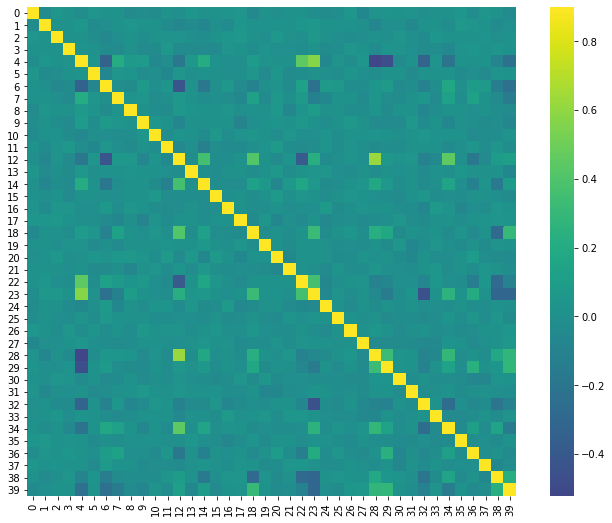

In [6]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, center = 0, cmap = 'viridis')

In [7]:
X = train
y = train_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
rf = RandomForestClassifier(max_depth=6, n_estimators = 2000)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

<ipython-input-8-f35ad641fe83>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.88


In [9]:
X_output = test
y_output_pred = rf.predict(X_output)

output = pd.DataFrame(columns = ['Id', 'Solution'])
output['Solution'] = y_output_pred
output['Id'] = list(range(1,9001))
print(output.tail())
output.to_csv('output.csv', index=False)

        Id  Solution
8995  8996         1
8996  8997         1
8997  8998         1
8998  8999         0
8999  9000         1
